# Dataset
Tập dữ liệu đào tạo mô hình về Dự báo thời tiết cho khí hậu Ấn Độ. Tập dữ liệu này cung cấp dữ liệu từ ngày 1 tháng 1 năm 2013 đến ngày 24 tháng 4 năm 2017 tại thành phố Delhi, Ấn Độ. 

Mục tiêu của dataset là dự đoán thời tiết dựa trên dữ liệu 3 giờ trước đó. Dữ liệu bao gồm là:
- Thời gian tại thời điểm đo đạc (ngày - tháng - năm).
- **Meantemp**.
- Độ ẩm.
- Tốc độ gió.
- Áp suất trung bình.

# Transform Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from pandas import DataFrame
from pandas import concat

In [ ]:
#read data train
data_train = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
data_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
data_train.shape

(1462, 5)

In [ ]:
#read data test
data_test = pd.read_csv('/content/DailyDelhiClimateTest.csv')
data_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
data_test.shape

(114, 5)

In [ ]:
#Merge data train and data set
data = data_train.append(data_test, ignore_index=True)
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
data.shape

(1576, 5)

In [ ]:
data = data.drop(['date'], axis=1)
pre_data = data.values
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1576.000000,1576.000000,1576.000000,1576.000000
mean,25.221918,60.445229,6.899262,1010.593178
std,7.345014,16.979994,4.510725,175.242704
min,6.000000,13.428571,0.000000,-3.041667
25%,18.500000,49.750000,3.700000,1001.875000
50%,27.166667,62.440476,6.363571,1009.055556
75%,31.142857,72.125000,9.262500,1015.200000
max,38.714286,100.000000,42.220000,7679.333333


In [ ]:
data.shape

(1576, 4)

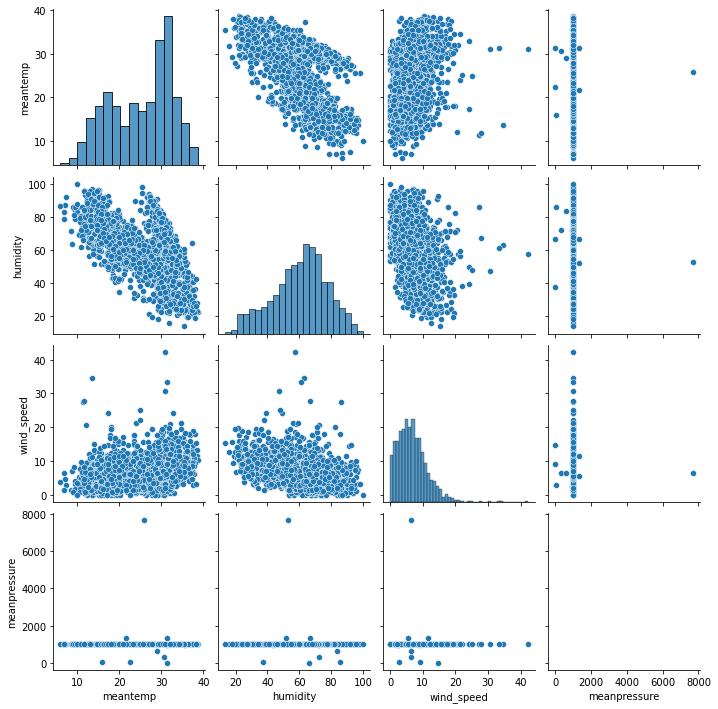

In [ ]:
#Trực quan hoá dữ liệu thông qua biểu đồ
sns.pairplot(data)

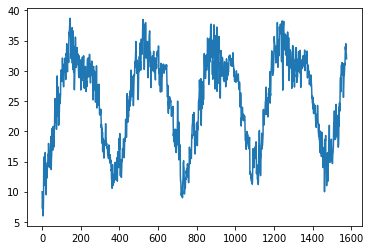

In [ ]:
plt.plot(data['meantemp'])

In [ ]:
scaler = MinMaxScaler()
pre_data = scaler.fit_transform(pre_data)
pre_data

array([[0.12227074, 0.8209571 , 0.        , 0.13260331],
       [0.04279476, 0.90759076, 0.07058266, 0.132881  ],
       [0.0356623 , 0.84983498, 0.10974262, 0.13299381],
       ...,
       [0.82227074, 0.31732673, 0.21056371, 0.13077228],
       [0.82150655, 0.16254125, 0.23596637, 0.13084061],
       [0.79475983, 0.15841584, 0.28794749, 0.13110328]])

In [ ]:
data_frame = DataFrame(pre_data)
data_frame

,0,1,2,3
0,0.122271,0.820957,0.000000,0.132603
1,0.042795,0.907591,0.070583,0.132881
2,0.035662,0.849835,0.109743,0.132994
3,0.081514,0.668867,0.029212,0.132799
4,0.000000,0.847910,0.087636,0.132712
...,...,...,...,...
1571,0.871179,0.162541,0.131750,0.130385
1572,0.863537,0.299711,0.164910,0.130548
1573,0.822271,0.317327,0.210564,0.130772
1574,0.821507,0.162541,0.235966,0.130841


In [ ]:
temp = []
# dữ liệu của 3 giờ trước
for i in range(3, 0, -1):
	temp.append(data_frame.shift(i))
#các thuộc tính thời tiết ở thời điểm hiện tại
temp.append(data_frame.shift(0).iloc[:, 0])
final_data = concat(temp, axis=1)
# print(sup_data)
final_data = final_data.dropna()
final_data = final_data.values
final_data.shape

(1573, 13)

In [ ]:
final_data

array([[0.12227074, 0.8209571 , 0.        , ..., 0.10974262, 0.13299381,
        0.08151383],
       [0.04279476, 0.90759076, 0.07058266, ..., 0.02921206, 0.13279856,
        0.        ],
       [0.0356623 , 0.84983498, 0.10974262, ..., 0.08763619, 0.13271178,
        0.03056769],
       ...,
       [0.84061135, 0.12355611, 0.21376125, ..., 0.16491   , 0.13054774,
        0.82227074],
       [0.87117904, 0.16254125, 0.13175036, ..., 0.21056371, 0.13077228,
        0.82150655],
       [0.86353712, 0.29971122, 0.16491   , ..., 0.23596637, 0.13084061,
        0.79475983]])

In [ ]:
train = final_data[0:1462]
test = final_data[1462:]
train.shape , test.shape
f_train, t_train = train[:, :12], train[:, -1]
f_test, t_test = test[:, :12], test[:, -1]
f_train.shape

(1462, 12)

# Model

In [ ]:
time_step = 3
n_dim = 4
f_train = f_train.reshape(f_train.shape[0], time_step, n_dim)
f_test = f_test.reshape(f_test.shape[0], time_step, n_dim)

In [ ]:
# Sử dụng Early Stopping để ngăn mô hình overfiting
over = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
model1 = Sequential()
model1.add(LSTM(100, input_shape=(f_train.shape[1], f_train.shape[2])))
model1.add(Dense(20))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam', metrics='mse')
model1_res = model1.fit(f_train, t_train, epochs=50, batch_size=50, validation_data=(f_test, t_test), verbose=2, shuffle=False, callbacks=[over])

Epoch 1/50
30/30 - 3s - loss: 0.1178 - mse: 0.1178 - val_loss: 0.0419 - val_mse: 0.0419 - 3s/epoch - 93ms/step
Epoch 2/50
30/30 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0138 - val_mse: 0.0138 - 175ms/epoch - 6ms/step
Epoch 3/50
30/30 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0050 - val_mse: 0.0050 - 147ms/epoch - 5ms/step
Epoch 4/50
30/30 - 0s - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0040 - val_mse: 0.0040 - 162ms/epoch - 5ms/step
Epoch 5/50
30/30 - 0s - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0038 - val_mse: 0.0038 - 187ms/epoch - 6ms/step
Epoch 6/50
30/30 - 0s - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0037 - val_mse: 0.0037 - 156ms/epoch - 5ms/step
Epoch 7/50
30/30 - 0s - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0036 - val_mse: 0.0036 - 150ms/epoch - 5ms/step
Epoch 8/50
30/30 - 0s - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0036 - val_mse: 0.0036 - 148ms/epoch - 5ms/step
Epoch 9/50
30/30 - 0s - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0036 - val_mse: 0.0036 - 169ms/ep

In [ ]:
model2 = Sequential()
model2.add(LSTM(80, input_shape=(f_train.shape[1], f_train.shape[2])))
model2.add(Dense(20))
model2.add(Dense(15))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam', metrics='mse')
model2_res = model2.fit(f_train, t_train, epochs=40, batch_size=60, validation_data=(f_test, t_test), verbose=2, shuffle=False, callbacks=[over])

Epoch 1/40
25/25 - 2s - loss: 0.0860 - mse: 0.0860 - val_loss: 0.0456 - val_mse: 0.0456 - 2s/epoch - 99ms/step
Epoch 2/40
25/25 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0169 - val_mse: 0.0169 - 116ms/epoch - 5ms/step
Epoch 3/40
25/25 - 0s - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0054 - val_mse: 0.0054 - 119ms/epoch - 5ms/step
Epoch 4/40
25/25 - 0s - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0041 - val_mse: 0.0041 - 118ms/epoch - 5ms/step
Epoch 5/40
25/25 - 0s - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0038 - val_mse: 0.0038 - 126ms/epoch - 5ms/step
Epoch 6/40
25/25 - 0s - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0036 - val_mse: 0.0036 - 121ms/epoch - 5ms/step
Epoch 7/40
25/25 - 0s - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0035 - val_mse: 0.0035 - 131ms/epoch - 5ms/step
Epoch 8/40
25/25 - 0s - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0035 - val_mse: 0.0035 - 124ms/epoch - 5ms/step
Epoch 9/40
25/25 - 0s - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0035 - val_mse: 0.0035 - 123ms/ep

In [ ]:
model3 = Sequential()
model3.add(LSTM(30, input_shape=(f_train.shape[1], f_train.shape[2])))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam', metrics='mse')
model3_res = model3.fit(f_train, t_train, epochs=30, batch_size=70, validation_data=(f_test, t_test), verbose=2, shuffle=False, callbacks=[over])

Epoch 1/30
21/21 - 2s - loss: 0.2011 - mse: 0.2011 - val_loss: 0.0696 - val_mse: 0.0696 - 2s/epoch - 111ms/step
Epoch 2/30
21/21 - 0s - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0461 - val_mse: 0.0461 - 84ms/epoch - 4ms/step
Epoch 3/30
21/21 - 0s - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0427 - val_mse: 0.0427 - 83ms/epoch - 4ms/step
Epoch 4/30
21/21 - 0s - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0311 - val_mse: 0.0311 - 99ms/epoch - 5ms/step
Epoch 5/30
21/21 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0251 - val_mse: 0.0251 - 90ms/epoch - 4ms/step
Epoch 6/30
21/21 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0195 - val_mse: 0.0195 - 80ms/epoch - 4ms/step
Epoch 7/30
21/21 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0146 - val_mse: 0.0146 - 82ms/epoch - 4ms/step
Epoch 8/30
21/21 - 0s - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0108 - val_mse: 0.0108 - 92ms/epoch - 4ms/step
Epoch 9/30
21/21 - 0s - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0081 - val_mse: 0.0081 - 112ms/epoch - 

In [ ]:
model4 = Sequential()
model4.add(LSTM(30, input_shape=(f_train.shape[1], f_train.shape[2])))
model4.add(Dense(50))
model4.add(Dense(20))
model4.add(Dense(10))
model4.add(Dense(5))
model4.add(Dense(1))
model4.compile(loss='mean_squared_error', optimizer='adam', metrics='mse')
model4_res = model4.fit(f_train, t_train, epochs=20, batch_size=80, validation_data=(f_test, t_test), verbose=2, shuffle=False, callbacks=[over])

Epoch 1/20
19/19 - 3s - loss: 0.0918 - mse: 0.0918 - val_loss: 0.0443 - val_mse: 0.0443 - 3s/epoch - 136ms/step
Epoch 2/20
19/19 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0072 - val_mse: 0.0072 - 79ms/epoch - 4ms/step
Epoch 3/20
19/19 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0030 - val_mse: 0.0030 - 89ms/epoch - 5ms/step
Epoch 4/20
19/19 - 0s - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0032 - val_mse: 0.0032 - 109ms/epoch - 6ms/step
Epoch 5/20
19/19 - 0s - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0030 - val_mse: 0.0030 - 99ms/epoch - 5ms/step
Epoch 6/20
19/19 - 0s - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0030 - val_mse: 0.0030 - 80ms/epoch - 4ms/step
Epoch 7/20
19/19 - 0s - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0030 - val_mse: 0.0030 - 83ms/epoch - 4ms/step
Epoch 8/20
19/19 - 0s - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0030 - val_mse: 0.0030 - 83ms/epoch - 4ms/step
Epoch 9/20
19/19 - 0s - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0030 - val_mse: 0.0030 - 89ms/epoch - 

In [ ]:
model5 = Sequential()
model5.add(LSTM(10, input_shape=(f_train.shape[1], f_train.shape[2])))
model5.add(Dense(5))
model5.add(Dense(2))
model5.add(Dense(1))
model5.compile(loss='mean_squared_error', optimizer='adam', metrics='mse')
model5_res = model5.fit(f_train, t_train, epochs=80, batch_size=20, validation_data=(f_test, t_test), verbose=2, shuffle=False, callbacks=[over])

In [ ]:
model6 = Sequential()
model6.add(LSTM(90, input_shape=(f_train.shape[1], f_train.shape[2])))
model6.add(Dense(80))
model6.add(Dense(70))
model6.add(Dense(60))
model6.add(Dense(50))
model6.add(Dense(40))
model6.add(Dense(30))
model6.add(Dense(20))
model6.add(Dense(10))
model6.add(Dense(1))
model6.compile(loss='mean_squared_error', optimizer='adam', metrics='mse')
model6_res = model6.fit(f_train, t_train, epochs=50, batch_size=50, validation_data=(f_test, t_test), verbose=2, shuffle=False, callbacks=[over])

# Draw Error

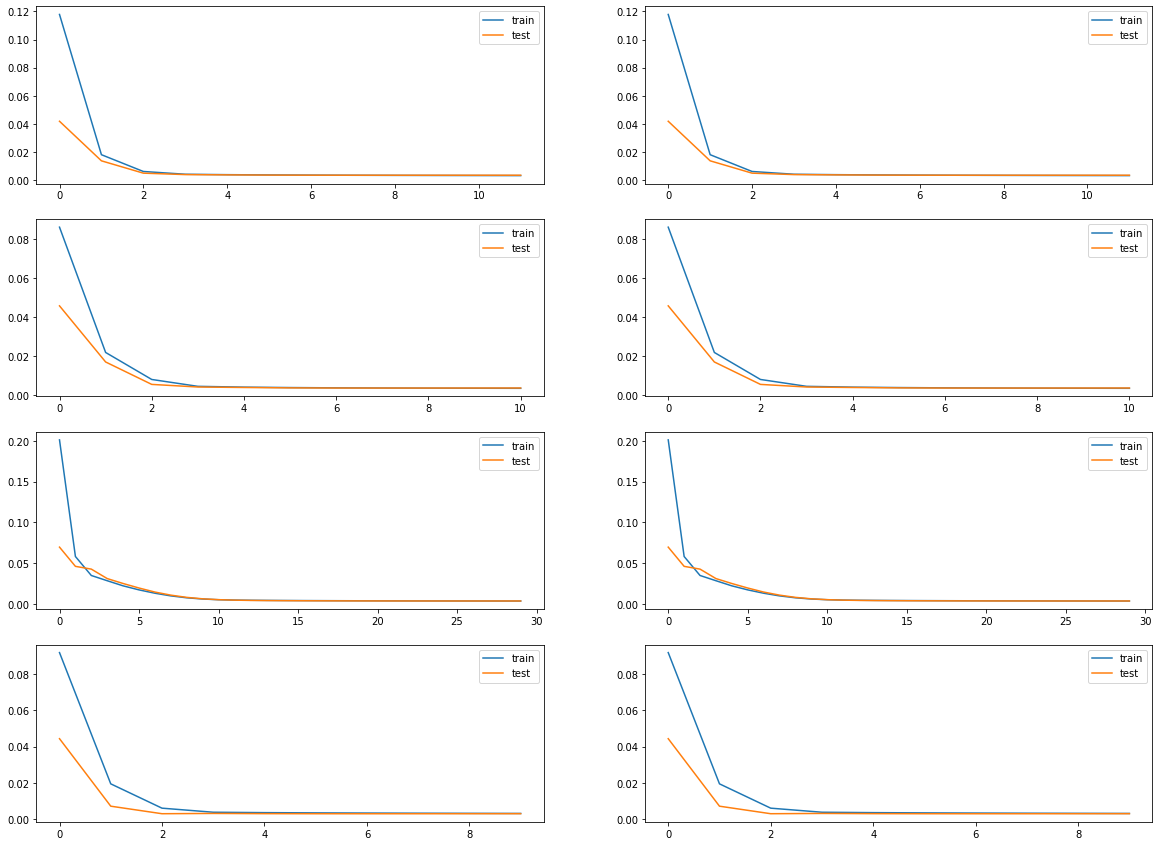

In [ ]:
fig, ax = plt.subplots(4,2)
ax[0][0].plot(model1_res.history['loss'],label ='train')
ax[0][0].plot(model1_res.history['val_loss'], label='test')
ax[0][1].plot(model1_res.history['mse'], label='train')
ax[0][1].plot(model1_res.history['val_mse'], label='test')

ax[1][0].plot(model2_res.history['loss'], label='train')
ax[1][0].plot(model2_res.history['val_loss'], label='test')
ax[1][1].plot(model2_res.history['mse'], label='train')
ax[1][1].plot(model2_res.history['val_mse'], label='test')

ax[2][0].plot(model3_res.history['loss'], label='train')
ax[2][0].plot(model3_res.history['val_loss'], label='test')
ax[2][1].plot(model3_res.history['mse'], label='train')
ax[2][1].plot(model3_res.history['val_mse'], label='test')

ax[3][0].plot(model4_res.history['loss'], label='train')
ax[3][0].plot(model4_res.history['val_loss'], label='test')
ax[3][1].plot(model4_res.history['mse'], label='train')
ax[3][1].plot(model4_res.history['val_mse'], label='test')

ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()
ax[2][0].legend()
ax[2][1].legend()
ax[3][0].legend()
ax[3][1].legend()
fig.set_figwidth(20)
fig.set_figheight(15)
